In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pour afficher les graphiques directement dans le notebook
%matplotlib inline

# Importation des données
df = pd.read_csv("C:/Users/sofia/OneDrive/Documents/GitHub/P_DM_UE3//data/combined_data.csv")
df.head()



,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416.0,418.62,421.24,...,981.27,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81,class
0,0.160989,0.152837,0.143099,0.132230,0.121732,0.113088,0.106684,0.102206,0.097464,0.094226,...,0.268508,0.268674,0.268942,0.269235,0.269651,0.270141,0.270695,0.271260,0.271902,canola
1,0.157316,0.148315,0.139275,0.129330,0.120090,0.112003,0.105155,0.100885,0.097040,0.093725,...,0.277404,0.277630,0.277895,0.278252,0.278681,0.279293,0.279852,0.280512,0.281131,canola
2,0.180705,0.171157,0.159826,0.147212,0.136382,0.126773,0.119723,0.115086,0.109832,0.105594,...,0.304266,0.304477,0.304762,0.305169,0.305732,0.306397,0.307044,0.307668,0.308387,canola
3,0.159618,0.151638,0.141948,0.131743,0.121592,0.112819,0.106271,0.101794,0.097496,0.094452,...,0.270041,0.270336,0.270555,0.270984,0.271544,0.272093,0.272727,0.273407,0.274073,canola
4,0.147031,0.139998,0.130906,0.121395,0.112400,0.104592,0.098618,0.095303,0.091420,0.088122,...,0.247827,0.248123,0.248419,0.248833,0.249397,0.249951,0.250570,0.251253,0.251939,canola


In [2]:
# Visualisation de la répartition des classes
plt.figure(figsize=(8, 5))
sns.countplot(x=y)  # ou x=y_encoded si tu utilises les labels encodés
plt.title("Répartition des classes dans le jeu de données")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


NameError: name 'y' is not defined

<Figure size 800x500 with 0 Axes>

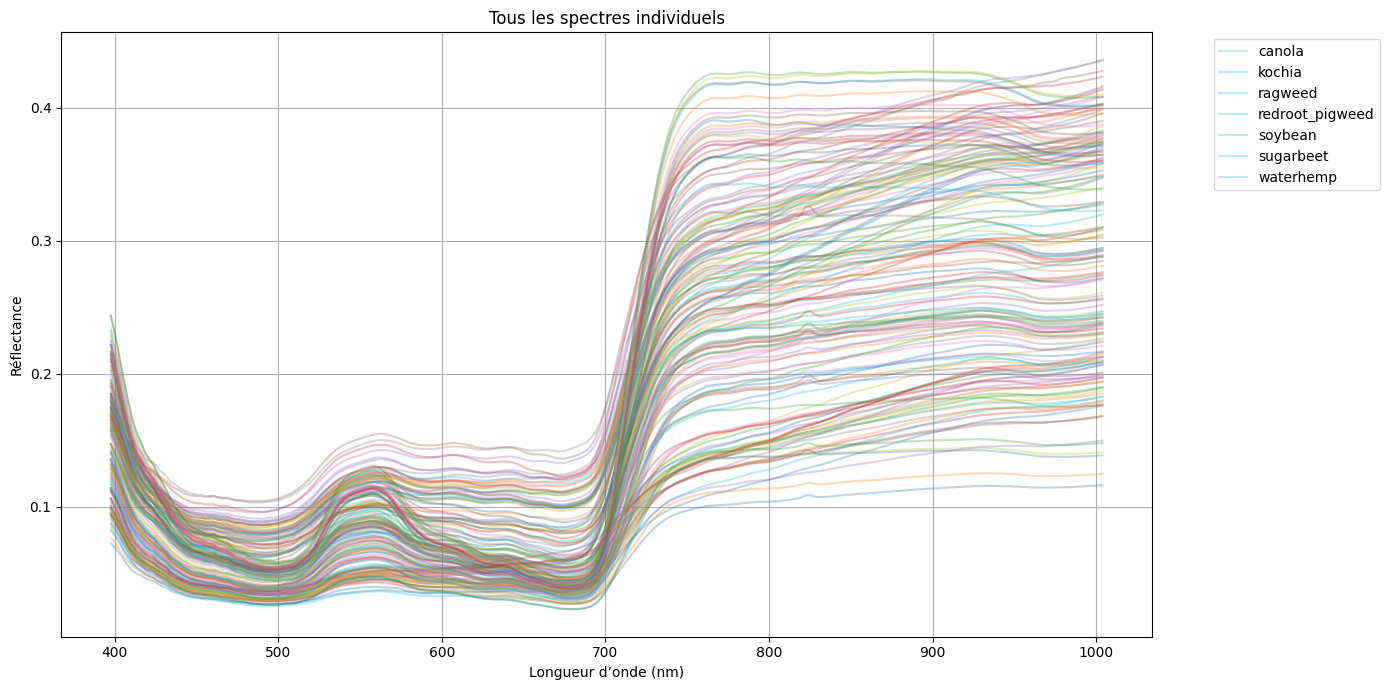

In [15]:
# X = colonnes spectrales (toutes sauf 'class')
X = df.drop(columns=["class"])

# y = étiquettes (noms de plantes)
y = df["class"]

# Conversion des longueurs d'onde en float pour les tracer
wavelengths = X.columns.astype(float)



plt.figure(figsize=(14, 7))

# Pour chaque échantillon, tracer son spectre avec une couleur correspondant à sa classe
for i in range(len(X)):
    plt.plot(wavelengths, X.iloc[i], alpha=0.3, label=y.iloc[i])

# Pour éviter les milliers de doublons dans la légende, on affiche une seule fois chaque classe
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Tous les spectres individuels")
plt.xlabel("Longueur d’onde (nm)")
plt.ylabel("Réflectance")
plt.grid(True)
plt.tight_layout()
plt.show()




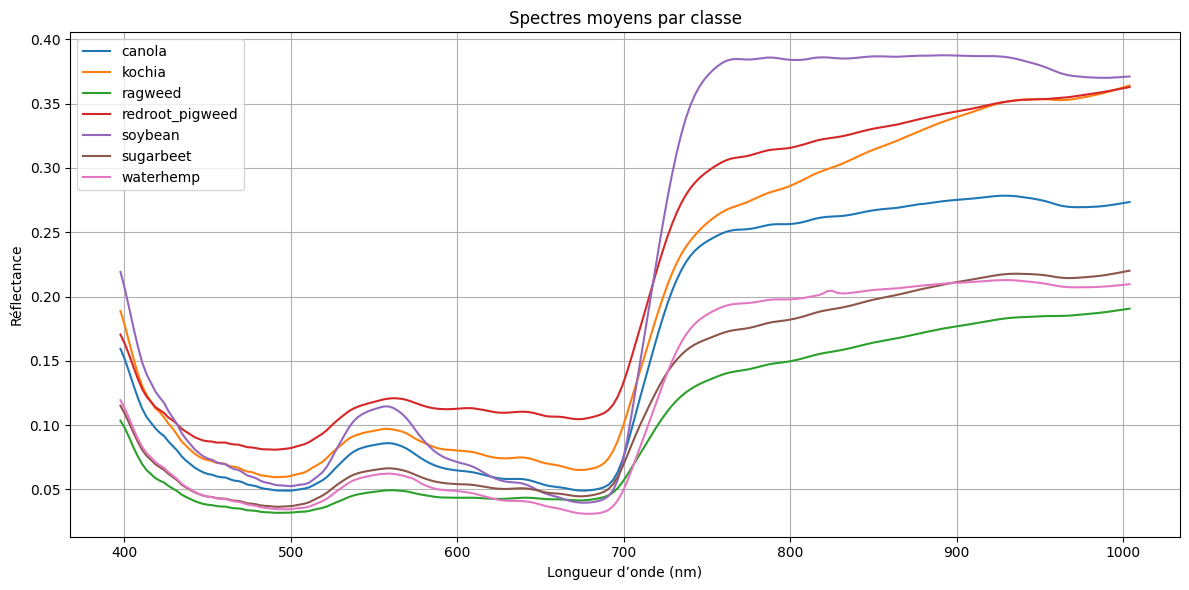

In [16]:
plt.figure(figsize=(12, 6))

# Tracer un spectre moyen par classe
for label in y.unique():
    mean_spectrum = X[y == label].mean()
    plt.plot(wavelengths, mean_spectrum, label=label)

plt.title("Spectres moyens par classe")
plt.xlabel("Longueur d’onde (nm)")
plt.ylabel("Réflectance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



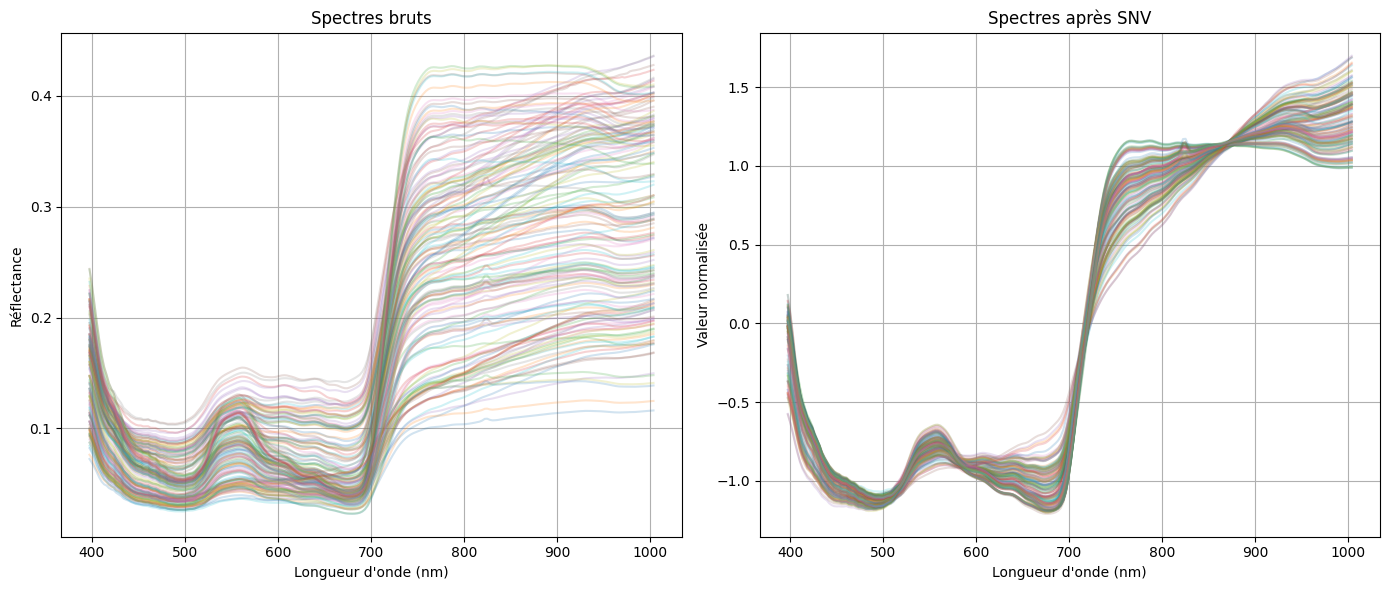

In [17]:
import numpy as np

# 📌 Fonction SNV appliquée ligne par ligne
def apply_snv(X_df):
    X_array = X_df.values
    snv_array = (X_array - X_array.mean(axis=1, keepdims=True)) / X_array.std(axis=1, keepdims=True)
    return pd.DataFrame(snv_array, columns=X_df.columns, index=X_df.index)

# 🔁 Application
X_snv = apply_snv(X)

# 📊 Visualisation AVANT / APRÈS
plt.figure(figsize=(14, 6))

# Avant SNV
plt.subplot(1, 2, 1)
for i in range(len(X)):
    plt.plot(wavelengths, X.iloc[i], alpha=0.2)
plt.title("Spectres bruts")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Réflectance")
plt.grid(True)

# Après SNV
plt.subplot(1, 2, 2)
for i in range(len(X_snv)):
    plt.plot(wavelengths, X_snv.iloc[i], alpha=0.2)
plt.title("Spectres après SNV")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Valeur normalisée")
plt.grid(True)

plt.tight_layout()
plt.show()


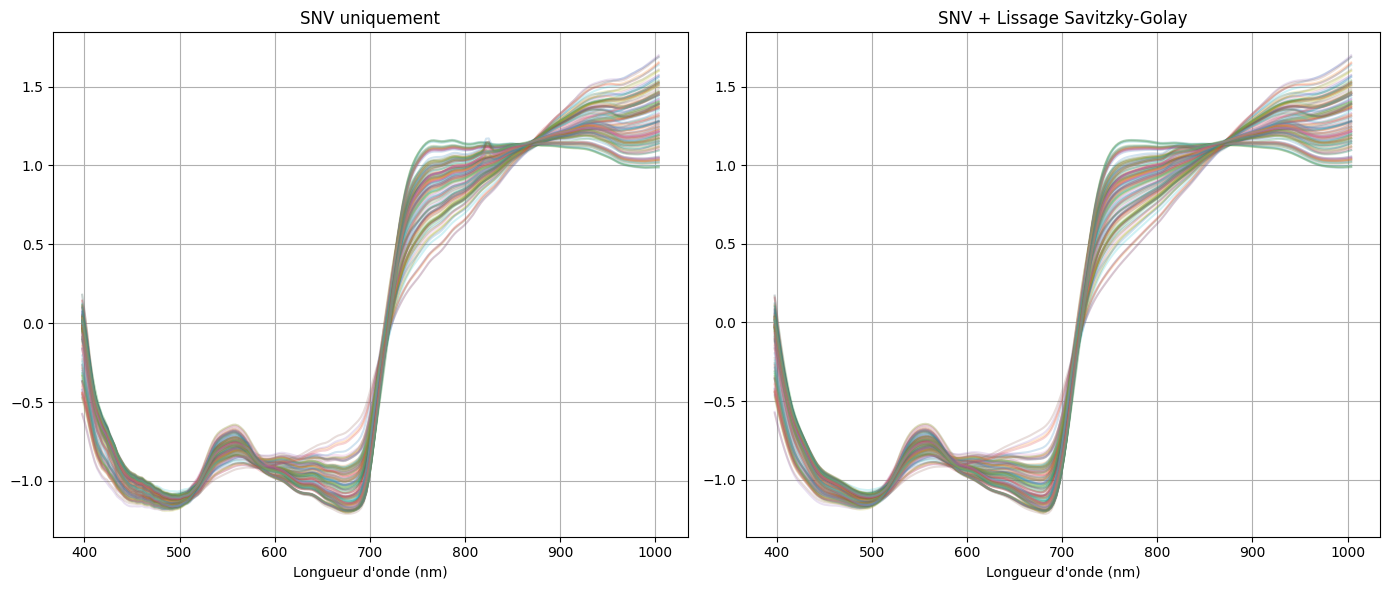

In [18]:
from scipy.signal import savgol_filter

# 📌 Fonction de lissage Savitzky-Golay
def apply_savgol(X_df, window_length=15, polyorder=2):
    smoothed_array = savgol_filter(X_df.values, window_length=window_length, polyorder=polyorder, axis=1)
    return pd.DataFrame(smoothed_array, columns=X_df.columns, index=X_df.index)

# 🔁 Application du lissage sur les spectres SNV
X_snv_smooth = apply_savgol(X_snv, window_length=15, polyorder=2)

# 📊 Visualisation AVANT / APRÈS le lissage
plt.figure(figsize=(14, 6))

# Avant : SNV seul
plt.subplot(1, 2, 1)
for i in range(len(X_snv)):
    plt.plot(wavelengths, X_snv.iloc[i], alpha=0.2)
plt.title("SNV uniquement")
plt.xlabel("Longueur d'onde (nm)")
plt.grid(True)

# Après : SNV + Savitzky-Golay
plt.subplot(1, 2, 2)
for i in range(len(X_snv_smooth)):
    plt.plot(wavelengths, X_snv_smooth.iloc[i], alpha=0.2)
plt.title("SNV + Lissage Savitzky-Golay")
plt.xlabel("Longueur d'onde (nm)")
plt.grid(True)

plt.tight_layout()
plt.show()


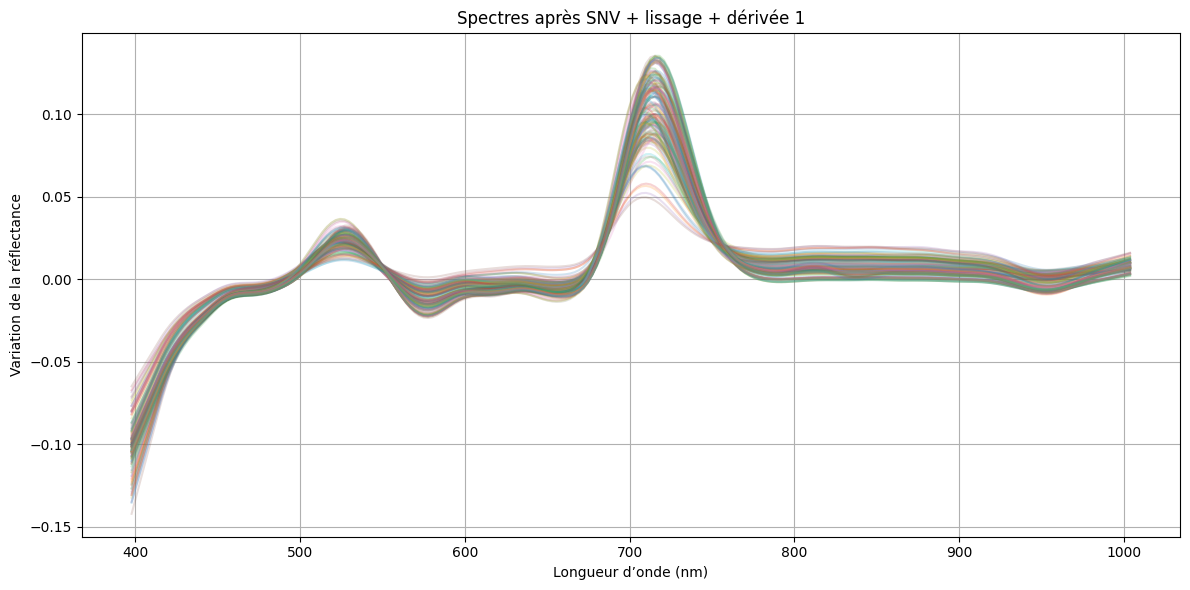

In [19]:
# 📌 Fonction dérivée de Savitzky-Golay
def apply_savgol_derivative(X_df, window_length=15, polyorder=2, deriv=1):
    derived_array = savgol_filter(X_df.values, window_length=window_length, polyorder=polyorder, deriv=deriv, axis=1)
    return pd.DataFrame(derived_array, columns=X_df.columns, index=X_df.index)

# 🔁 Application : SNV + lissage + dérivée 1
X_preprocessed = apply_savgol_derivative(X_snv_smooth, window_length=15, polyorder=2, deriv=1)

# 📊 Visualisation des spectres après dérivée
plt.figure(figsize=(12, 6))
for i in range(len(X_preprocessed)):
    plt.plot(wavelengths, X_preprocessed.iloc[i], alpha=0.2)
    
plt.title("Spectres après SNV + lissage + dérivée 1")
plt.xlabel("Longueur d’onde (nm)")
plt.ylabel("Variation de la réflectance")
plt.grid(True)
plt.tight_layout()
plt.show()


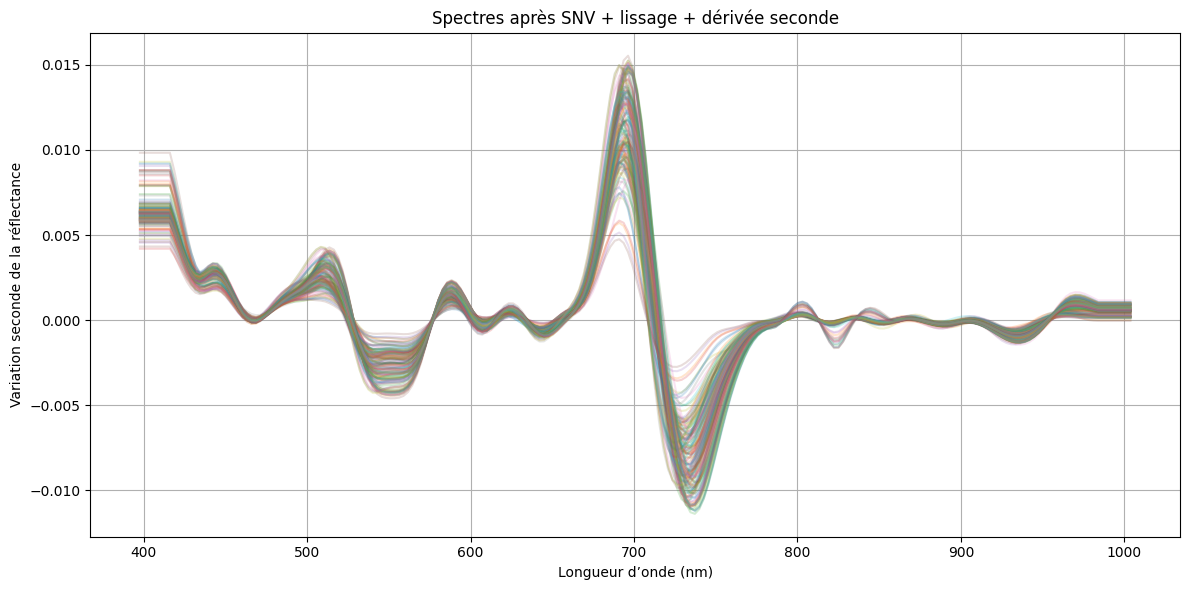

In [20]:
# 🔁 Application : SNV + lissage + dérivée 2
X_preprocessed_d2 = apply_savgol_derivative(X_snv_smooth, window_length=15, polyorder=2, deriv=2)

# 📊 Visualisation des spectres après dérivée seconde
plt.figure(figsize=(12, 6))
for i in range(len(X_preprocessed_d2)):
    plt.plot(wavelengths, X_preprocessed_d2.iloc[i], alpha=0.2)
    
plt.title("Spectres après SNV + lissage + dérivée seconde")
plt.xlabel("Longueur d’onde (nm)")
plt.ylabel("Variation seconde de la réflectance")
plt.grid(True)
plt.tight_layout()
plt.show()


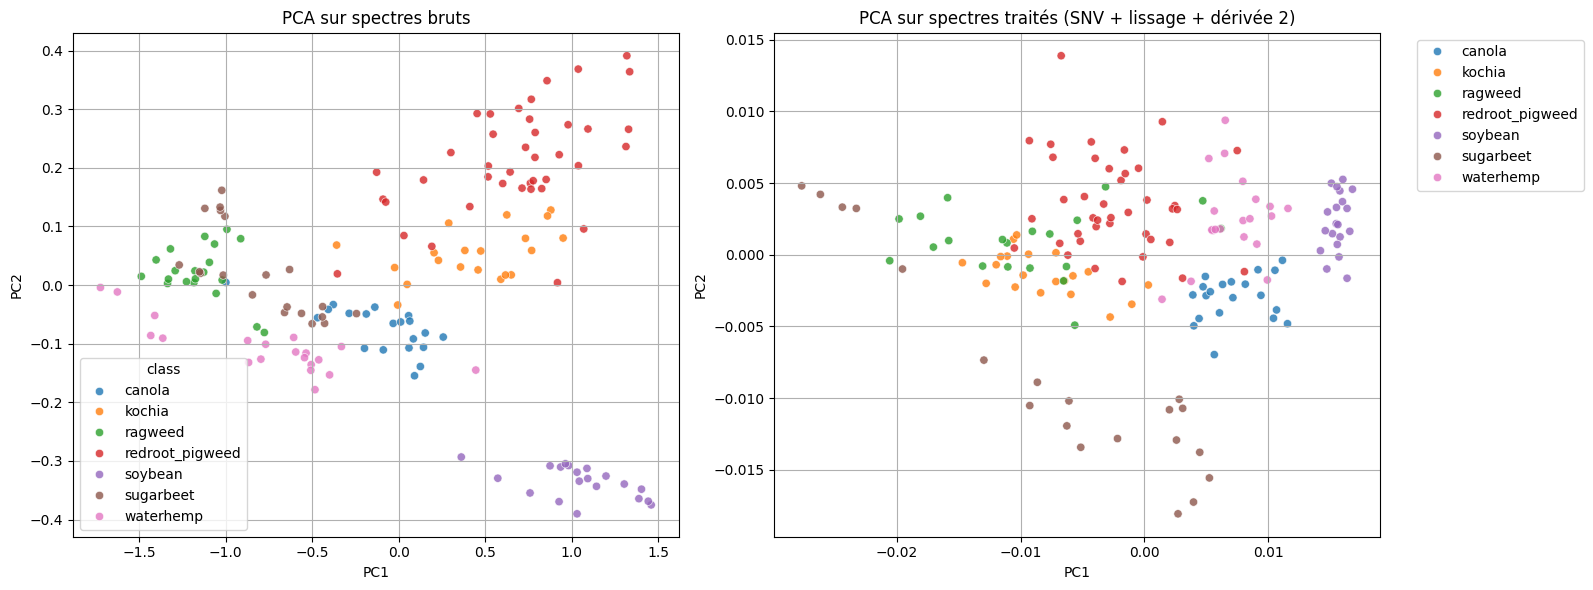

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- PCA sur les données brutes ---
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X)

# --- PCA sur les données prétraitées (SNV + lissage + dérivée 2) ---
# Recalcul si nécessaire
X_array = X.values
X_snv = (X_array - X_array.mean(axis=1, keepdims=True)) / X_array.std(axis=1, keepdims=True)
X_snv_smooth = savgol_filter(X_snv, window_length=15, polyorder=2, axis=1)
X_preprocessed_d2 = savgol_filter(X_snv, window_length=15, polyorder=2, deriv=2, axis=1)
pca_processed = PCA(n_components=2)
X_pca_processed = pca_processed.fit_transform(X_preprocessed_d2)

# --- Visualisation côte à côte ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Données brutes
sns.scatterplot(x=X_pca_raw[:, 0], y=X_pca_raw[:, 1], hue=y, palette='tab10', alpha=0.8, ax=axes[0])
axes[0].set_title("PCA sur spectres bruts")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)

# Données traitées
sns.scatterplot(x=X_pca_processed[:, 0], y=X_pca_processed[:, 1], hue=y, palette='tab10', alpha=0.8, ax=axes[1])
axes[1].set_title("PCA sur spectres traités (SNV + lissage + dérivée 2)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].grid(True)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [23]:
# 📦 Imports IA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 🔤 Encodage des classes (si ce n’est pas déjà fait)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ✂️ Séparation en 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_d2, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 🤖 Entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔮 Prédictions sur le jeu de test
y_pred = rf_model.predict(X_test)

# 📊 Évaluation du modèle
print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("\n📄 Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("🧮 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy : 1.0

📄 Rapport de classification :
                 precision    recall  f1-score   support

         canola       1.00      1.00      1.00         4
         kochia       1.00      1.00      1.00         4
        ragweed       1.00      1.00      1.00         4
redroot_pigweed       1.00      1.00      1.00         8
        soybean       1.00      1.00      1.00         4
      sugarbeet       1.00      1.00      1.00         4
      waterhemp       1.00      1.00      1.00         4

       accuracy                           1.00        32
      macro avg       1.00      1.00      1.00        32
   weighted avg       1.00      1.00      1.00        32

🧮 Matrice de confusion :
[[4 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 4 0 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 0 4]]


In [24]:
# Recherche des meilleurs hyperparamètres

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,  # validation croisée à 5 plis
                           scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Récupération du meilleur modèle entraîné par GridSearch
best_model = grid_search.best_estimator_

# Validation croisée à 10 plis avec ce modèle
scores = cross_val_score(best_model, X_preprocessed_d2, y_encoded, cv=10, scoring='accuracy')

# Résultats
print("Scores de validation croisée (10 plis) avec les meilleurs hyperparamètres :", scores)
print("✅ Moyenne des scores :", np.mean(scores).round(4))
print("📉 Écart-type des scores :", np.std(scores).round(4))


Scores de validation croisée (10 plis) avec les meilleurs hyperparamètres : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
✅ Moyenne des scores : 1.0
📉 Écart-type des scores : 0.0


<Figure size 800x600 with 0 Axes>

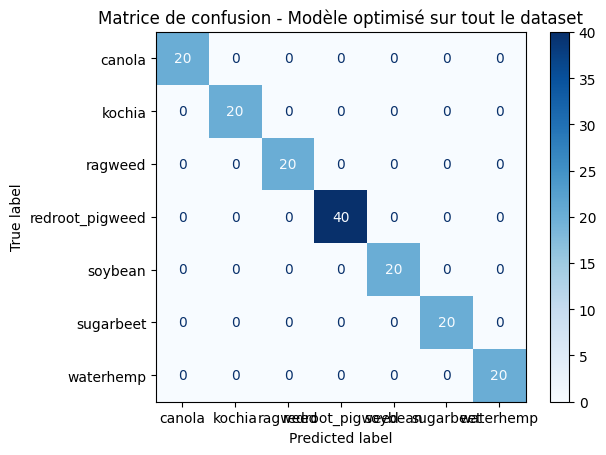

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédictions avec le meilleur modèle
y_pred = best_model.predict(X_preprocessed_d2)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_encoded, y_pred)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion - Modèle optimisé sur tout le dataset")
plt.grid(False)
plt.show()
